In [1]:
import time
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft
import pandas as pd
import seaborn as sns
import math
import sys
import os
from sabreMod import sosf,sosfh
from scipy import interpolate

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

In [2]:
start=time.time()

In [3]:
orion=pd.read_table('Obs/Orion.csv', delimiter=',')
orion.describe()

,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,-0.133333,0.300000,0.366667,0.095833,0.525000,0.062500,-0.700000,-0.295833,0.141667,-0.279167,...,-1.654167,-2.845833,-1.891667,-1.308333,-0.825000,-1.041667,-0.633333,-0.166667,0.229167,0.450000
std,0.814898,1.298494,0.995497,1.257492,1.217713,1.553905,2.062291,3.833092,2.790343,2.699272,...,3.067640,2.998692,2.519647,2.137230,2.639376,1.916500,1.313034,0.755079,0.859464,1.595919
min,-3.900000,-2.500000,0.000000,-3.500000,-1.000000,-2.900000,-4.500000,-7.000000,-3.100000,-3.900000,...,-7.400000,-9.100000,-6.400000,-6.000000,-6.100000,-5.100000,-4.600000,-3.700000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-0.600000,-2.325000,-2.550000,-2.325000,-2.100000,...,-3.150000,-5.000000,-4.725000,-2.625000,-2.200000,-1.925000,-0.175000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.400000,-0.300000,-0.050000,...,-1.900000,-2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.200000,0.925000,0.000000,0.000000,0.125000,1.000000,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.700000,4.300000,4.600000,3.200000,3.900000,5.100000,3.800000,10.400000,6.900000,8.900000,...,6.800000,1.900000,1.400000,3.100000,7.400000,1.400000,0.500000,0.000000,4.000000,7.000000


In [4]:
#orion[orion == 0] = 'nan' 
#orion

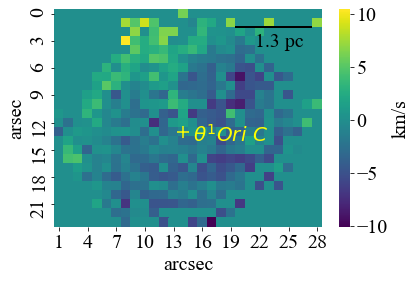

In [5]:
fig, ax = plt.subplots()
sns.heatmap(orion,cmap="viridis",cbar_kws={'label': 'km/s'})
plt.scatter(13.5, 13.5, marker='+', color='yellow', s=150)
ax.set(xlabel='arcsec', ylabel='arsec')

ax.text(0.93, 0.81, '1.3 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
plt.axhline(y=2, xmin=0.68, xmax=0.96, linewidth=2, color = 'k')

plt.text(14.5, 14.5, '$θ^{1}Ori\ C$', fontsize=20, color='yellow')

plt.show()

In [6]:
df=orion.stack().reset_index().rename(columns={'level_0':'RAdeg', 'level_1':'DEdeg', 0:'RVHalpha'})
df.describe()

,RAdeg,RVHalpha
count,672.000000,672.000000
mean,11.500000,-0.667857
std,6.927343,2.440544
min,0.000000,-10.100000
25%,5.750000,-2.000000
50%,11.500000,0.000000
75%,17.250000,0.000000
max,23.000000,10.400000


In [7]:
df.RAdeg=1.0*df.RAdeg

In [8]:
df.DEdeg=pd.to_numeric(df.DEdeg)*1.0

Structure Function

In [9]:
df0 = pd.DataFrame({'X': df.RAdeg, 'Y': df.DEdeg, 'RV': df.RVHalpha})
df0.describe()

,X,Y,RV
count,672.000000,672.000000,672.000000
mean,11.500000,14.500000,-0.667857
std,6.927343,8.083764,2.440544
min,0.000000,1.000000,-10.100000
25%,5.750000,7.750000,-2.000000
50%,11.500000,14.500000,0.000000
75%,17.250000,21.250000,0.000000
max,23.000000,28.000000,10.400000


In [10]:
df0["RV"] = df0["RV"].replace(['0', 0], np.nan)


In [11]:
df0.describe()

,X,Y,RV
count,672.000000,672.000000,359.000000
mean,11.500000,14.500000,-1.250139
std,6.927343,8.083764,3.230147
min,0.000000,1.000000,-10.100000
25%,5.750000,7.750000,-3.400000
50%,11.500000,14.500000,-1.800000
75%,17.250000,21.250000,0.700000
max,23.000000,28.000000,10.400000


In [12]:
data=df0

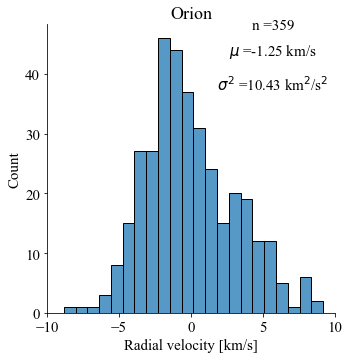

In [42]:
#fig, ax = plt.subplots()

sns.displot(data.RV-data.RV.mean(),bins=25)
plt.xlim(-10,10)

plt.text(0.45, 0.86,'n ='+str(data.RV.count()), ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.78,'$μ$ ='+str(np.round(data.RV.mean(),2))+' km/s', ha='center', va='center', transform=ax.transAxes, color='k')
plt.text(0.45, 0.68,'$σ^{2}$ ='+str(np.round(data.RV.var(),2))+' km$^{2}$/s$^{2}$', ha='center', va='center', transform=ax.transAxes, color='k')

plt.title('Orion')

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="15"

plt.xlabel('Radial velocity [km/s]')
plt.savefig('Hist//Orion.pdf', bbox_inches='tight')

In [14]:
pc=.145

1.0


C:\Users\ZAINTEL2\Dropbox\Articulos\PhD\Master\sabreMod.py:75: RuntimeWarning: invalid value encountered in greater
  ind=np.squeeze(d[:,1])>0.0


[None, None]

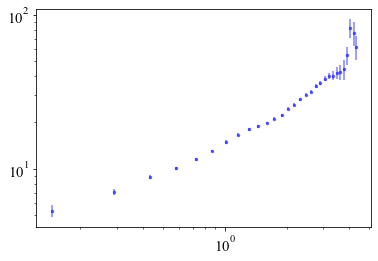

In [15]:
data=df0
SF=sosf(data)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [16]:
dfx = SF[['Lag', 'Nmqvd','ErrX','ErrY']].copy()
dfx=dfx.rename(columns={"Lag": "pc", "Nmqvd": "S"})
dfx.to_csv('SFdata//Orion1.csv',mode = 'w', index=False)

In [17]:
#x=SF['Lag']
#y=SF['Nmqvd']-(data["RV"].std())**2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [18]:
#x=np.linspace((SF.Lag.min()),(SF.Lag.max()),100)
#c=1/(1+(x/lo)**n)
#y=2*(1-c)*ss
#plt.loglog(x,y,color='k', linestyle='-')

Dr. Will

In [19]:
df1 = pd.DataFrame({'RA': df.RAdeg, 'DE': df.DEdeg, 'V': df.RVHalpha, '_key': 1})
df1.describe()

,RA,DE,V,_key
count,672.000000,672.000000,672.000000,672.0
mean,11.500000,14.500000,-0.667857,1.0
std,6.927343,8.083764,2.440544,0.0
min,0.000000,1.000000,-10.100000,1.0
25%,5.750000,7.750000,-2.000000,1.0
50%,11.500000,14.500000,0.000000,1.0
75%,17.250000,21.250000,0.000000,1.0
max,23.000000,28.000000,10.400000,1.0


In [20]:
df2 = df1.copy()

In [21]:
pairs = pd.merge(df1, df2, on='_key', suffixes=('', '_')).drop('_key', 1)
pairs.index = pd.MultiIndex.from_product((df1.index, df2.index))

pairs.head()

RA   DE    V  RA_  DE_   V_
0 0  0.0  1.0  0.0  0.0  1.0  0.0
  1  0.0  1.0  0.0  0.0  2.0  0.0
  2  0.0  1.0  0.0  0.0  3.0  0.0
  3  0.0  1.0  0.0  0.0  4.0  0.0
  4  0.0  1.0  0.0  0.0  5.0  0.0

In [22]:
pairs.loc[:, 'dDE'] =(pairs.DE - pairs.DE_)
pairs.loc[:, 'dRA'] = (pairs.RA - pairs.RA_)*np.cos(np.radians(0.5*(pairs.DE + pairs.DE_)))
pairs.loc[:, 's'] = np.hypot(pairs.dRA, pairs.dDE)
pairs.loc[:, 'log_s'] = np.log10(pairs.s)
pairs.loc[:, 'dV'] = pairs.V - pairs.V_
pairs.loc[:, 'dV2'] = pairs.dV**2
pairs.loc[:, 'log_dV2'] = np.log10(pairs.dV**2)
pairs.loc[:, 'VV_mean'] = 0.5*(pairs.V + pairs.V_)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
pairs = pairs[(pairs.dDE > 0.0) & (pairs.dRA > 0.0)]
pairs.head()

RA   DE    V  RA_  DE_   V_  dDE       dRA         s     log_s   dV  \
29 0  1.0  2.0  0.0  0.0  1.0  0.0  1.0  0.999657  1.413971  0.150441  0.0   
30 0  1.0  3.0  0.0  0.0  1.0  0.0  2.0  0.999391  2.235796  0.349432  0.0   
   1  1.0  3.0  0.0  0.0  2.0  0.0  1.0  0.999048  1.413541  0.150308  0.0   
31 0  1.0  4.0  0.0  0.0  1.0  0.0  3.0  0.999048  3.161977  0.499959  0.0   
   1  1.0  4.0  0.0  0.0  2.0  0.0  2.0  0.998630  2.235455  0.349366  0.0   

      dV2  log_dV2  VV_mean  
29 0  0.0     -inf      0.0  
30 0  0.0     -inf      0.0  
   1  0.0     -inf      0.0  
31 0  0.0     -inf      0.0  
   1  0.0     -inf      0.0

In [24]:
pairs.describe()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
count,104328.000000,104328.000000,104328.000000,104328.000000,104328.000000,104328.000000,104328.000000,104328.000000,104328.000000,104328.000000,104328.000000,104328.000000,1.043280e+05,104328.000000
mean,15.666667,19.333333,-1.279214,7.333333,9.666667,0.058256,9.666667,8.029366,13.725400,1.079118,-1.337469,13.412203,-inf,-0.610479
std,5.527734,6.472194,2.235633,5.527734,6.472194,2.493243,6.472194,5.331970,6.312483,0.246519,3.409324,23.595534,NaN,1.643558
min,1.000000,2.000000,-10.100000,0.000000,1.000000,-9.100000,1.000000,0.887011,1.336708,0.126037,-20.500000,0.000000,-inf,-8.750000
25%,12.000000,15.000000,-2.800000,3.000000,4.000000,-0.300000,4.000000,3.746689,8.877447,0.948288,-3.400000,0.090000,-1.045757e+00,-1.650000
50%,17.000000,20.000000,0.000000,6.000000,9.000000,0.000000,9.000000,6.940114,13.368558,1.126085,-0.400000,4.840000,6.848454e-01,-0.350000
75%,20.000000,25.000000,0.000000,11.000000,14.000000,0.300000,14.000000,11.779526,18.265833,1.261639,0.000000,16.000000,1.204120e+00,0.000000
max,23.000000,28.000000,10.400000,22.000000,27.000000,10.400000,27.000000,22.992118,34.997670,1.544039,13.100000,420.250000,2.623508e+00,7.800000


In [25]:
pairs.corr()

,RA,DE,V,RA_,DE_,V_,dDE,dRA,s,log_s,dV,dV2,log_dV2,VV_mean
RA,1.000000e+00,-6.322050e-15,-0.038451,5.000000e-01,-2.490864e-15,-0.182209,-2.388463e-15,0.499450,0.288865,0.284860,0.108036,-0.073614,-0.071292,-0.164355
DE,-6.322050e-15,1.000000e+00,0.155188,-2.272709e-15,5.000000e-01,-0.099788,5.000000e-01,-0.030981,0.372479,0.336629,0.174738,-0.032378,0.061222,0.029858
V,-3.845097e-02,1.551879e-01,1.000000,-1.922549e-02,7.759396e-02,-0.036704,7.759396e-02,-0.027817,0.052031,0.009061,0.682583,-0.446550,-0.347061,0.652280
RA_,5.000000e-01,-2.272709e-15,-0.019225,1.000000e+00,-1.193366e-15,-0.364418,-1.149753e-15,-0.499450,-0.288865,-0.284860,0.253893,-0.119772,-0.159219,-0.289483
DE_,-2.490864e-15,5.000000e-01,0.077594,-1.193366e-15,1.000000e+00,-0.199576,-5.000000e-01,-0.035072,-0.418896,-0.382269,0.196832,0.040254,0.062021,-0.098603
V_,-1.822092e-01,-9.978801e-02,-0.036704,-3.644183e-01,-1.995760e-01,1.000000,9.978801e-02,0.188198,0.192761,0.191844,-0.755370,0.424410,0.251149,0.733526
dDE,-2.388463e-15,5.000000e-01,0.077594,-1.149753e-15,-5.000000e-01,0.099788,1.000000e+00,0.004091,0.791375,0.718898,-0.022094,-0.072632,0.001881,0.128461
dRA,4.994500e-01,-3.098104e-02,-0.027817,-4.994500e-01,-3.507174e-02,0.188198,4.090698e-03,1.000000,0.581441,0.572491,-0.155870,0.047974,0.092315,0.123827
s,2.888647e-01,3.724789e-01,0.052031,-2.888647e-01,-4.188960e-01,0.192761,7.913749e-01,0.581441,1.000000,0.944003,-0.106848,-0.034217,0.056317,0.181595
log_s,2.848602e-01,3.366287e-01,0.009061,-2.848602e-01,-3.822691e-01,0.191844,7.188978e-01,0.572491,0.944003,1.000000,-0.134354,0.007385,0.066905,0.151674


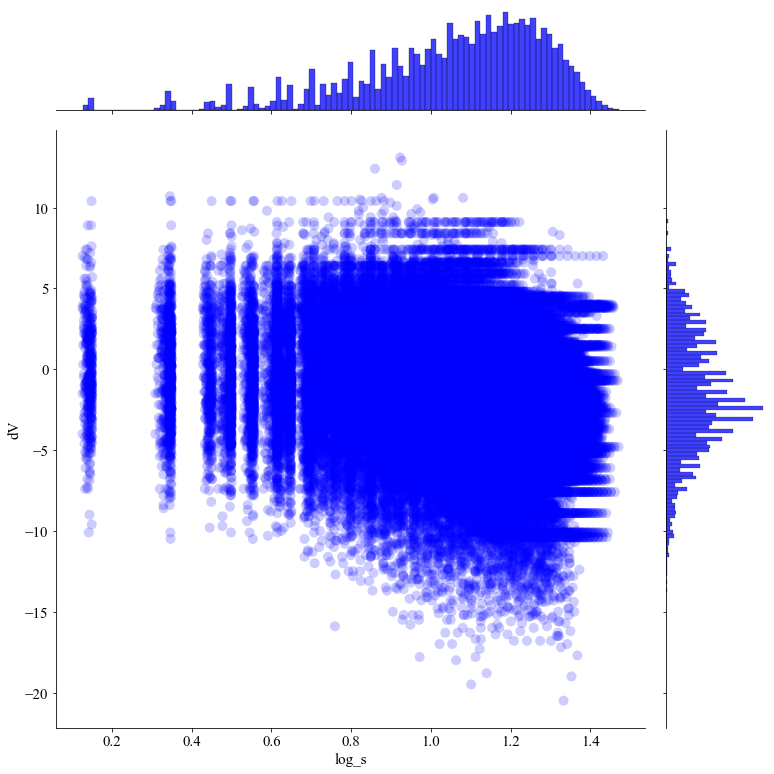

In [26]:
mask = (pairs.log_s > 0) & (pairs.log_dV2 > -4)
ax = sns.jointplot(x='log_s', y='dV', data=pairs[mask], alpha=0.2, s=100, edgecolor='none',color="blue")
ax.fig.set_size_inches(12, 12)

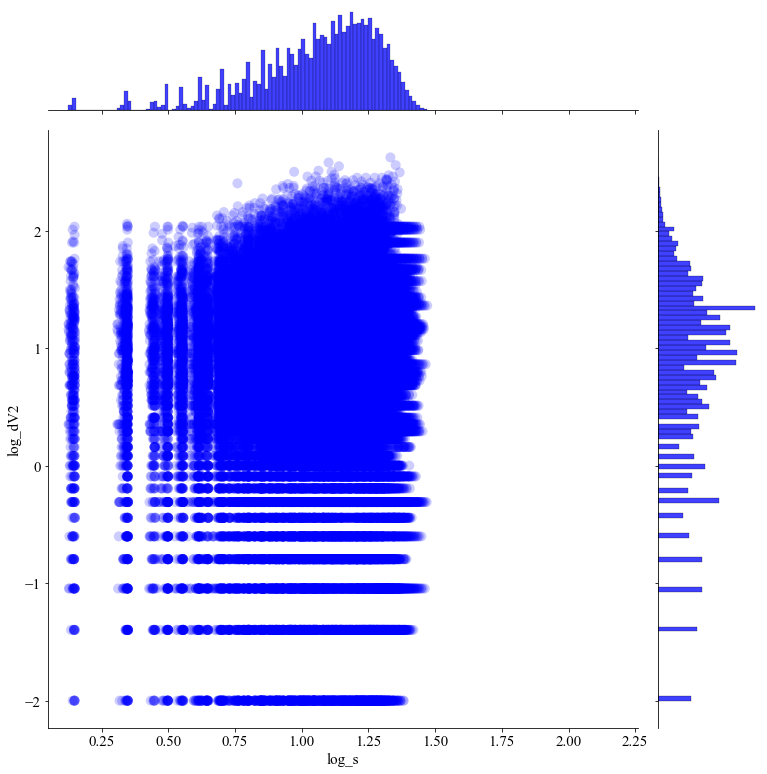

In [27]:
mask = (pairs.log_s > 0) & (pairs.log_dV2 > -4)
ax = sns.jointplot(x='log_s', y='log_dV2', data=pairs[mask], alpha=0.2, s=100, edgecolor='none', color="blue", xlim=[0.05, 2.26])
ax.fig.set_size_inches(12, 12)

In [28]:
pairs.loc[:, 's_class'] = pd.Categorical((2*pairs.log_s + 0.5).astype('int'), ordered=True)
pairs.s_class[pairs.s_class == 0] = 1

In [29]:
for j in range(5):
    print()
    print("s_class =", j)
    print(pairs[pairs.s_class == j][['dV2', 'log_s']].describe())


s_class = 0
       dV2  log_s
count  0.0    0.0
mean   NaN    NaN
std    NaN    NaN
min    NaN    NaN
25%    NaN    NaN
50%    NaN    NaN
75%    NaN    NaN
max    NaN    NaN

s_class = 1
                dV2         log_s
count  10955.000000  10955.000000
mean       9.629245      0.563423
std       15.271204      0.158620
min        0.000000      0.126037
25%        0.040000      0.492090
50%        3.610000      0.614130
75%       12.960000      0.694892
max      144.000000      0.749902

s_class = 2
                dV2         log_s
count  64781.000000  64781.000000
mean      15.271095      1.053882
std       24.828318      0.133777
min        0.000000      0.750462
25%        0.640000      0.956640
50%        6.250000      1.077695
75%       18.490000      1.168190
max      380.250000      1.249984

s_class = 3
                dV2         log_s
count  28592.000000  28592.000000
mean      10.649942      1.333885
std       22.902962      0.057563
min        0.000000      1.250018
25% 

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


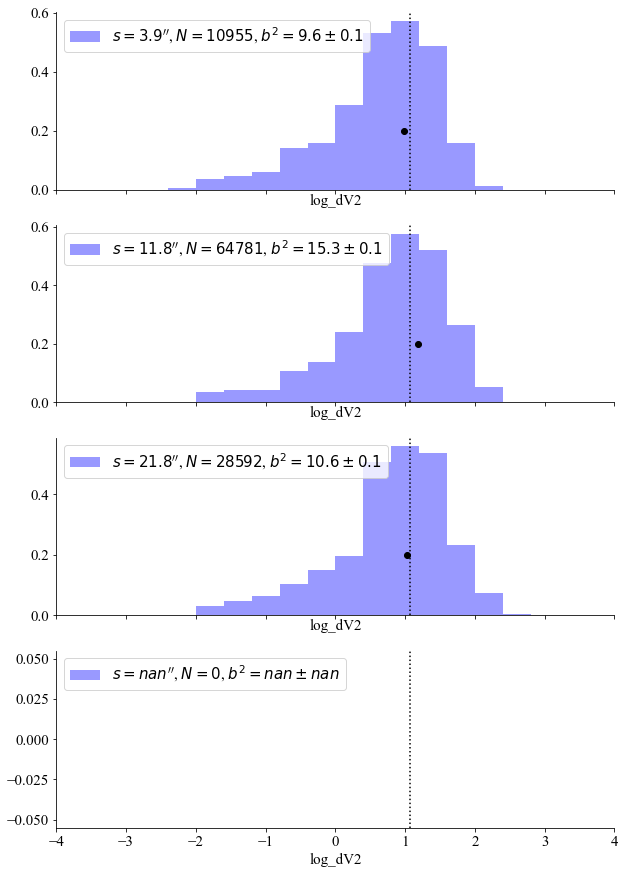

In [30]:
sig2 = pairs.dV2.mean()
sig2a = 2*np.var(df1.V)
fig, axes = plt.subplots(4, 1, figsize=(10, 15), sharex=True)
for sclass, ax in zip(range(1, 5), axes):
    b2mean = np.mean(pairs.dV2[pairs.s_class == sclass])
    b2std = np.std(pairs.dV2[pairs.s_class == sclass])
    b2mean2 = np.mean(pairs.log_dV2[pairs.s_class == sclass])
    n = np.sum(pairs.s_class == sclass)
    b2sem = b2std/np.sqrt(n)
    smean = np.mean(10**pairs.log_s[pairs.s_class == sclass])
    label = f"$s = {smean:.1f}''$"
    label += f", $N = {n}$"
    label += fr", $b^2 = {b2mean:.1f} \pm {b2sem:.1f}$"
    sns.distplot(pairs.log_dV2[pairs.s_class == sclass], 
                 norm_hist=True, kde=False, ax=ax,
                 label=label, bins=20, color="blue",hist_kws=dict(range=[-4.0, 4.0])
                )
    ax.plot([np.log10(b2mean)], [0.2], 'o', color='k')
    ax.plot([np.log10(b2mean - b2sem), np.log10(b2mean + b2sem)], [0.2]*2, lw=3, color='k')
    ax.axvline(np.log10(sig2a), color='k', ls=':')
    ax.set(xlim=[-4.0, 4.0])
    ax.legend(loc='upper left')
sns.despine()

In [31]:
print(f'Dotted line is 2 x sigma^2 = {sig2a:.2f}')

Dotted line is 2 x sigma^2 = 11.89


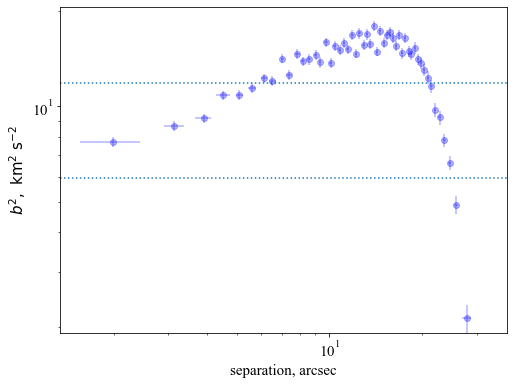

In [32]:
ngroup = 2000
groups = np.arange(len(pairs)) // ngroup
table = pairs[['s', 'dV2']].sort_values('s').groupby(groups).describe()
fig, ax = plt.subplots(figsize=(8, 6))
s = table[('s', 'mean')]
e_s = table[('s', 'std')]
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')]/np.sqrt(ng - 1)
ax.axhline(sig2a, ls=':')
ax.axhline(0.5*sig2a, ls=':')
ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.3, color="blue")
#sgrid = np.logspace(0.3, 1.65)
#ax.plot(sgrid, 38.5*sgrid**(0.8), color="k", lw=0.5)
ax.set(xscale='log', yscale='log', 
       xlabel='separation, arcsec',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

In [33]:
table=[s*pc,b2,e_s,e_b2]
dfx2=pd.DataFrame(table)
dfx2=dfx2.transpose()
dfx2=dfx2.set_axis(['pc', 'S', 'ErrX', 'ErrY'], axis=1, inplace=False)
dfx2.to_csv('SFdata//Orion2.csv',mode = 'w', index=False)

[None,
 Text(0, 0.5, '$b^2,\\ \\mathrm{km^2\\ s^{-2}}$'),
 None,
 Text(0.5, 0, 'separation, pc')]

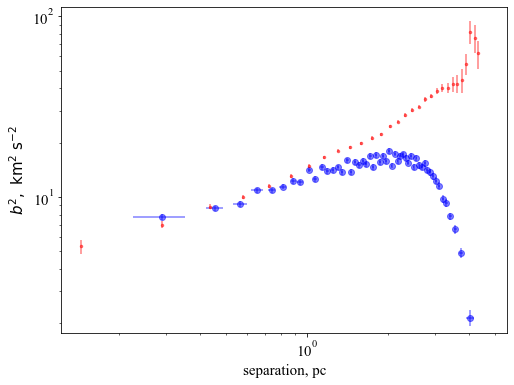

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s*.145, b2, yerr=e_b2, xerr=e_s*.145, fmt='o', alpha=0.5,color="blue")

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.5, markersize=5)

ax.set(xscale='log', yscale='log', 
       xlabel='separation, pc',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )

In [35]:
#fig, ax = plt.subplots(figsize=(7, 7))

#ax.errorbar(s*.145, b2, yerr=e_b2, xerr=e_s*.145, fmt='o', alpha=0.5,color="blue",label='Dr. Will')

#ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
#                     alpha=0.5, markersize=5,label='phd')

#lo=0.1
#ss=np.round((data['RV'].std())**2,2)
#s0=0.1

#n=0.6
#x=np.linspace(-1,(SF.Lag.max()),100)
#c=1/(1+(x/lo)**n)

#y=2*(1-c)*ss

#sgrid = np.logspace(-1, 1)
#ax.plot(sgrid, 5.2*sgrid**(0.75), color="k", lw=2, linestyle='--')

#plt.axhline(y=ss, color='r', linestyle='--')
#plt.axvline(x=s0, color='k', linestyle='--')


#plt.loglog(x,y,color='k', linestyle='-')

#sgrid = np.logspace(-1, 300)
#ax.plot(sgrid, 12*sgrid**(0.3), color="k", lw=2, linestyle='--')

#textstr = '\n'.join((r'$m=%.2f$'%n,r'm$_{--}=%.2f$'%0.75, r'$r_{0}=%.2f$' % s0+' [pc]',
#                     r'$σ_{POS}=%.2f$' % (df0["RV"].std()) + ' [km/s]' )) 

#props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#ax.text(0.65, .5, textstr, transform=ax.transAxes, fontsize=14,
#        verticalalignment='top', bbox=props)

#ax.set(xscale='log', yscale='log', 
#       xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]'    )

#ax.set_xlim(0.1, 200)
#ax.set_ylim(1, 1000)

#plt.legend()

#fig.savefig('SFM42.pdf', bbox_inches='tight')

In [36]:
finish=time.time()
print("Runnig time:",finish-start, "seconds" )

Runnig time: 12.112748622894287 seconds
